In [125]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import pandas as pd
import numpy as np
from collections import defaultdict
mpl.rcParams['figure.dpi'] = 120  # make plots bigger by default

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import model_selection

# Import Data
df_data contains tumor data

In [242]:
names =['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave points1','symmetry1','fractal dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave points2','symmetry2','fractal dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave points3','symmetry3','fractal dimension3']
df_data = pd.read_table('wdbc.data.txt', sep=',',names = names)

#df_names = pd.read_clipboard('wdbc.names.txt')
df_data.head()


,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Malignant and Benign Tumor Radius Distribution
Tumors were separated based on the diagnosis.
Each radius measurement was plotted. Radius 1-3 were plotted separately for each diagnosis & tumor.
Generally, the range of radii for malignant tumors were higher for each measurement than the benign tumors.

Text(0.5,1,'Benign Tumor Size Distribution')

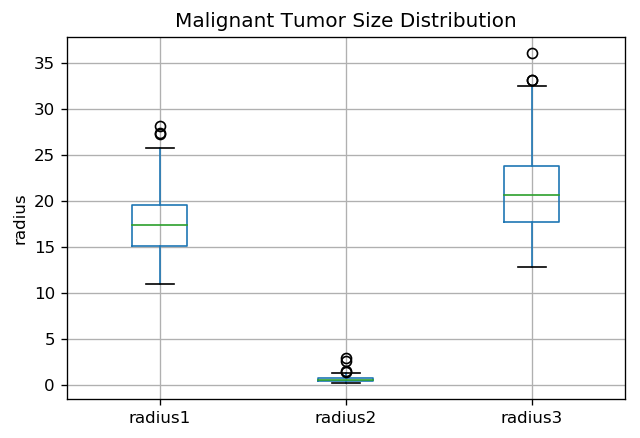

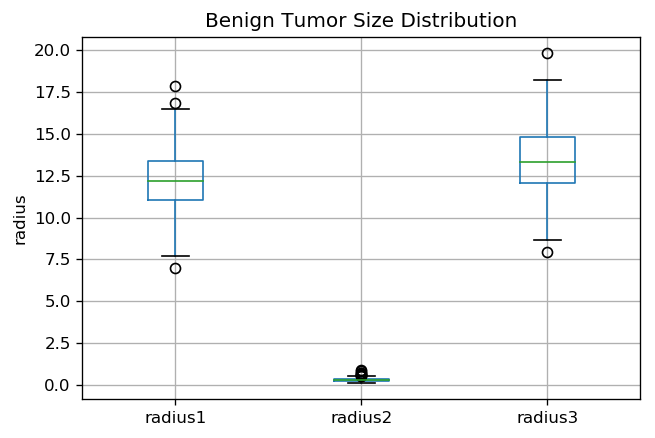

In [273]:
mask_M = df_data['Diagnosis'].map(lambda x: 'M' in str(x) if not '' else False)
malignant = df_data[mask_M]

mask_B = df_data['Diagnosis'].map(lambda x: 'B' in str(x) if not '' else False)
benign = df_data[mask_B]

fm, axm = plt.subplots()
malignant.boxplot(['radius1','radius2','radius3'])
axm.set_ylabel('radius')
axm.set_title('Malignant Tumor Size Distribution')

fb, axb = plt.subplots()
benign.boxplot(['radius1','radius2','radius3'])
axb.set_ylabel('radius')
axb.set_title('Benign Tumor Size Distribution')

# Assessing Balance of Dataset
There are 212 malignant and 357 benign tumors in the sample.

Text(0.5,0,'Diagnosis')

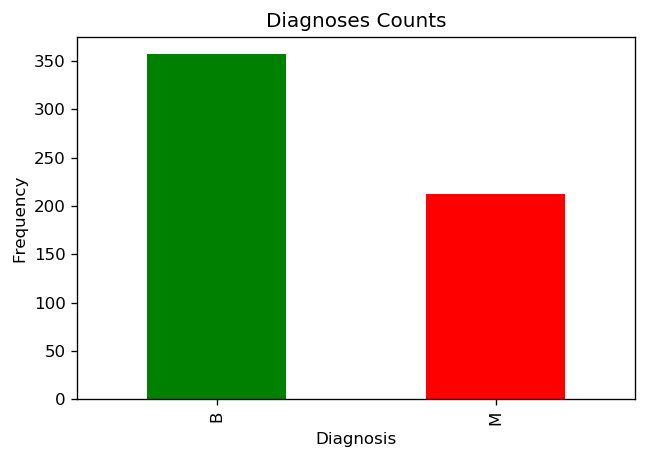

In [274]:
diag = df_data['Diagnosis']
fig, ax = plt.subplots()
diag.value_counts().plot(ax=ax, title='Diagnoses Counts', kind='bar',color=['Green','Red'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Diagnosis')

# Distribution of Various Features

In [277]:
# mean features calculated below (combined feature1-3)

df_data['mean_radius']=(df_data['radius1']+df_data['radius2']+df_data['radius3'])/3
df_data['mean_texture']=(df_data['texture1']+df_data['texture2']+df_data['texture3'])/3
df_data['mean_perimeter']=(df_data['perimeter1']+df_data['perimeter2']+df_data['perimeter3'])/3
df_data['mean_area']=(df_data['area1']+df_data['area2']+df_data['area3'])/3
df_data['mean_smoothness']=(df_data['smoothness1']+df_data['smoothness2']+df_data['smoothness3'])/3
df_data['mean_compactness']=(df_data['compactness1']+df_data['compactness2']+df_data['compactness3'])/3
df_data['mean_concavity']=(df_data['concavity1']+df_data['concavity2']+df_data['concavity3'])/3
df_data['mean_concave_points']=(df_data['concave points1']+df_data['concave points2']+df_data['concave points3'])/3
df_data['mean_symmetry']=(df_data['symmetry1']+df_data['symmetry2']+df_data['symmetry3'])/3
df_data['mean_fractal_dimension']=(df_data['fractal dimension1']+df_data['fractal dimension2']+df_data['fractal dimension3'])/3
df_data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,mean_concave_points,mean_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934,0.142790,0.067934
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741,0.089857,0.049741
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714,0.130493,0.050714
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216,0.127123,0.093216
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908,0.095217,0.046908


# Mean Distributions (Malignant vs Benign)
Malignant tumors plotted in Red
Benign tumors plotted in Green

Variables with significant overlap for Malignant and Benign tumors might suggest that it would be difficult to use that variable to predict malignancy.
Low level of correlation with diagnosis.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


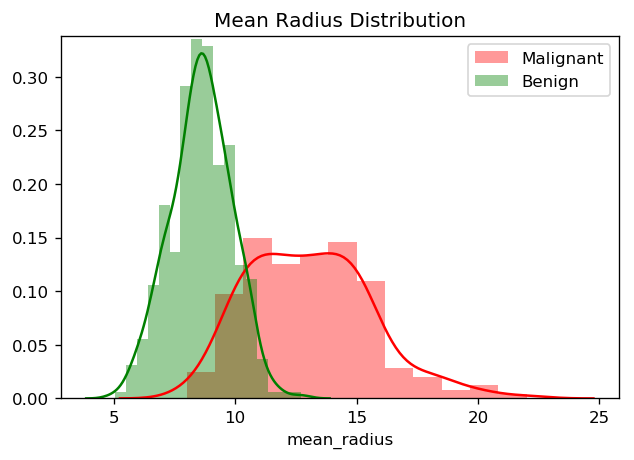

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


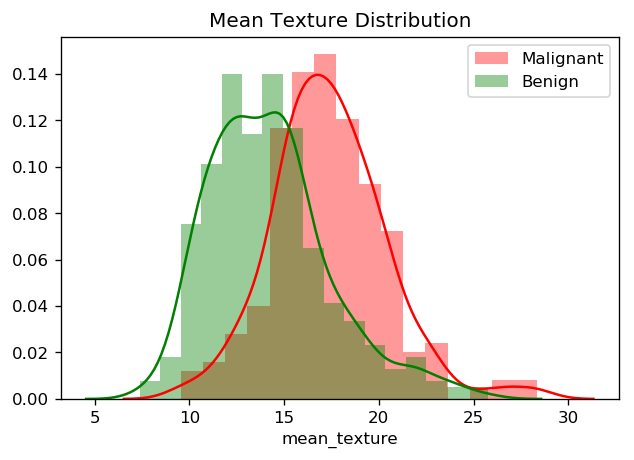

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


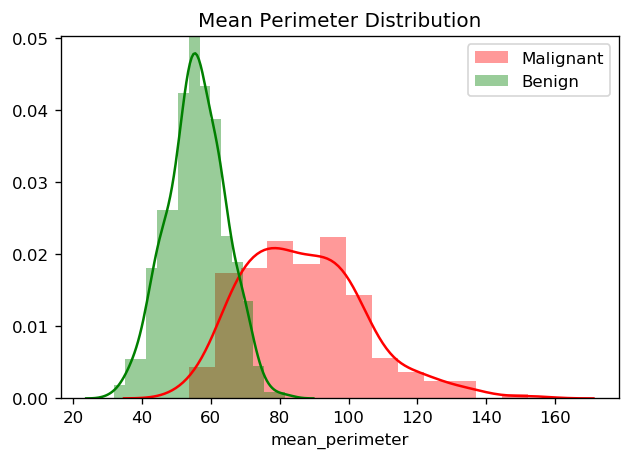

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


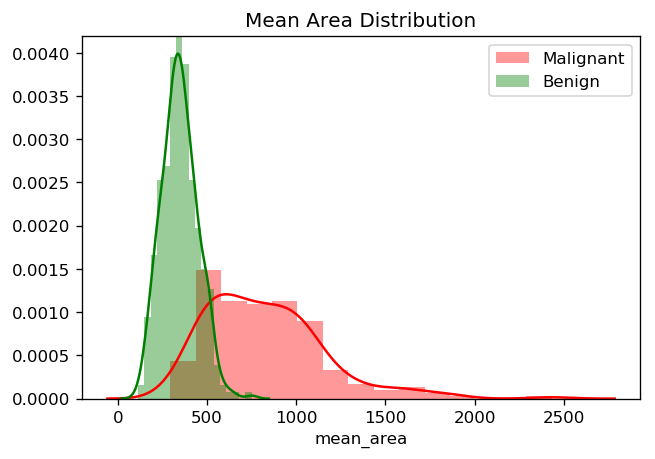

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


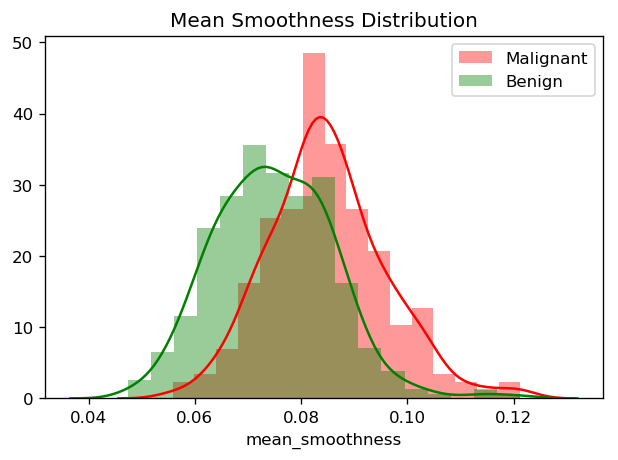

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


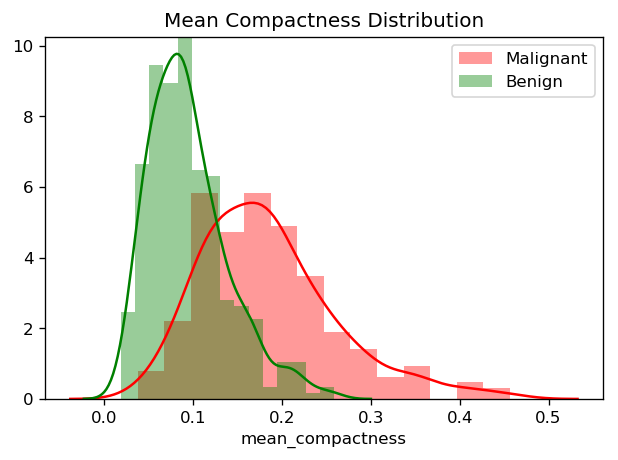

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


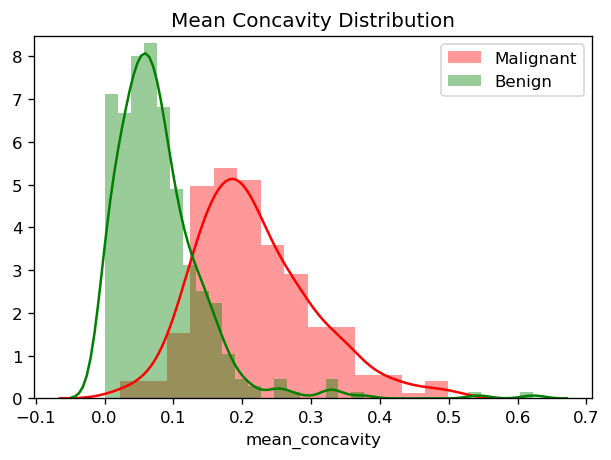

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


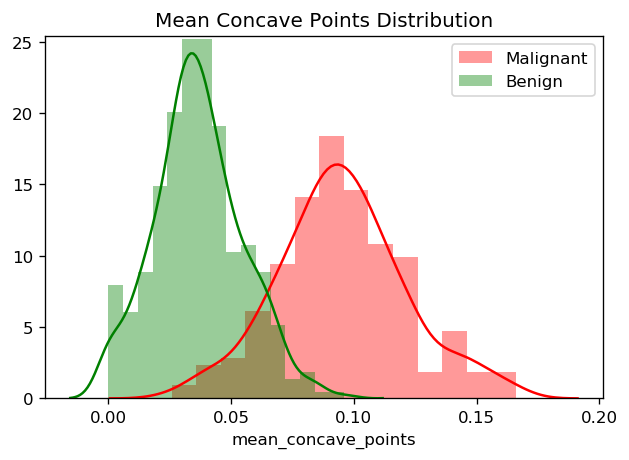

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


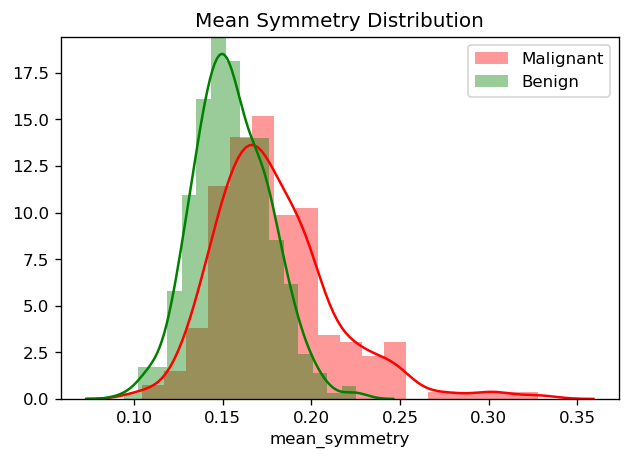

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


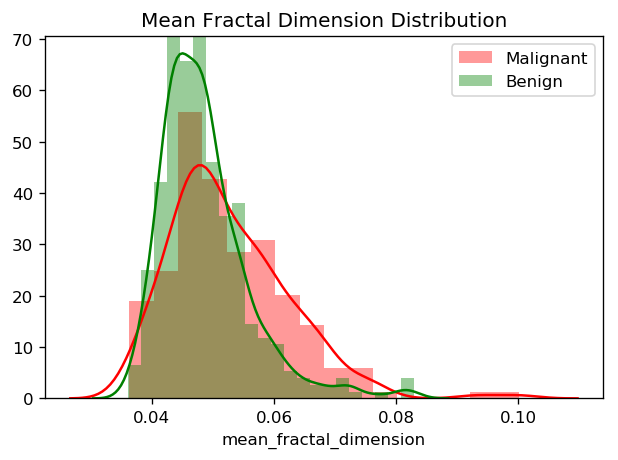

In [279]:
mal = df_data['Diagnosis'].map(lambda x: 'M' in str(x) if not '' else False)
df_mal = df_data[mal]
ben = df_data['Diagnosis'].map(lambda x: 'B' in str(x) if not '' else False)
df_ben = df_data[ben]

# RADIUS
plt.figure("Radius")
sns.distplot(df_mal['mean_radius'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_radius'], label='Benign', color='green')
plt.title('Mean Radius Distribution')
plt.legend()
plt.show()

# TEXTURE
plt.figure("Texture")
sns.distplot(df_mal['mean_texture'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_texture'], label='Benign', color='green')
plt.title('Mean Texture Distribution')
plt.legend()
plt.show()

# Perimeter
plt.figure("Perimeter")
sns.distplot(df_mal['mean_perimeter'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_perimeter'], label='Benign', color='green')
plt.title('Mean Perimeter Distribution')
plt.legend()
plt.show()

# AREA
plt.figure("Area")
sns.distplot(df_mal['mean_area'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_area'], label='Benign', color='green')
plt.title('Mean Area Distribution')
plt.legend()
plt.show()

# SMOOTHNESS
plt.figure("Smoothness")
sns.distplot(df_mal['mean_smoothness'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_smoothness'], label='Benign', color='green')
plt.title('Mean Smoothness Distribution')
plt.legend()
plt.show()

# COMPACTNESS
plt.figure("Compactness")
sns.distplot(df_mal['mean_compactness'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_compactness'], label='Benign', color='green')
plt.title('Mean Compactness Distribution')
plt.legend()
plt.show()

# CONCAVITY
plt.figure("Concavity")
sns.distplot(df_mal['mean_concavity'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_concavity'], label='Benign', color='green')
plt.title('Mean Concavity Distribution')
plt.legend()
plt.show()

# CONCAVE POINTS
plt.figure("Concave Points")
sns.distplot(df_mal['mean_concave_points'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_concave_points'], label='Benign', color='green')
plt.title('Mean Concave Points Distribution')
plt.legend()
plt.show()

# SYMMETRY
plt.figure("Symmetry")
sns.distplot(df_mal['mean_symmetry'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_symmetry'], label='Benign', color='green')
plt.title('Mean Symmetry Distribution')
plt.legend()
plt.show()

# FRACTAL DIMENSION
plt.figure("Fractal Dimension")
sns.distplot(df_mal['mean_fractal_dimension'], label='Malignant', color='Red')
sns.distplot(df_ben['mean_fractal_dimension'], label='Benign', color='green')
plt.title('Mean Fractal Dimension Distribution')
plt.legend()
plt.show()

## Visual Analysis
Features that appeared to show large difference in distribution, based on diagnois: Radius, Perimeter, Area, Compactness, Concavity, Concave Points

Features that showed some/little deviation: Texture, Smoothness, Symmetry, Fractal Dimension.

# Correlation Heatmap

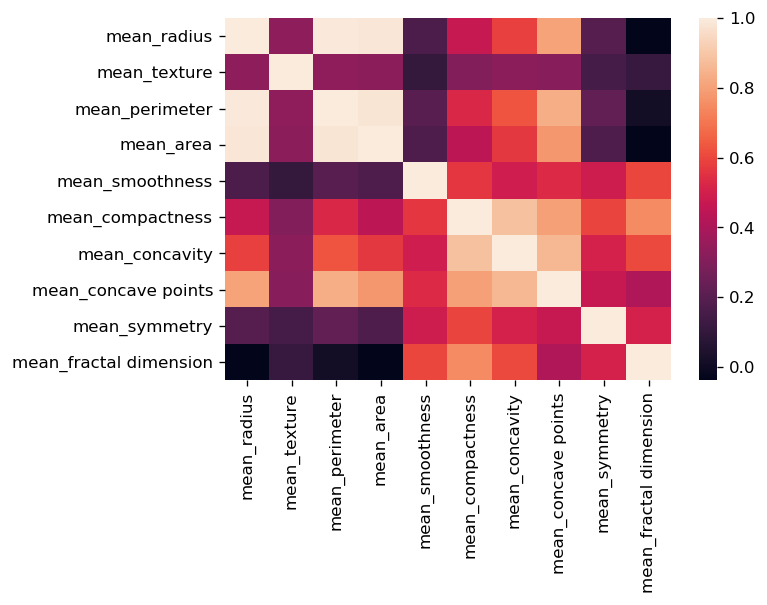

In [131]:
df_corr = df_data.iloc[:,32:]
corr = df_corr.corr()
sns.heatmap(corr)

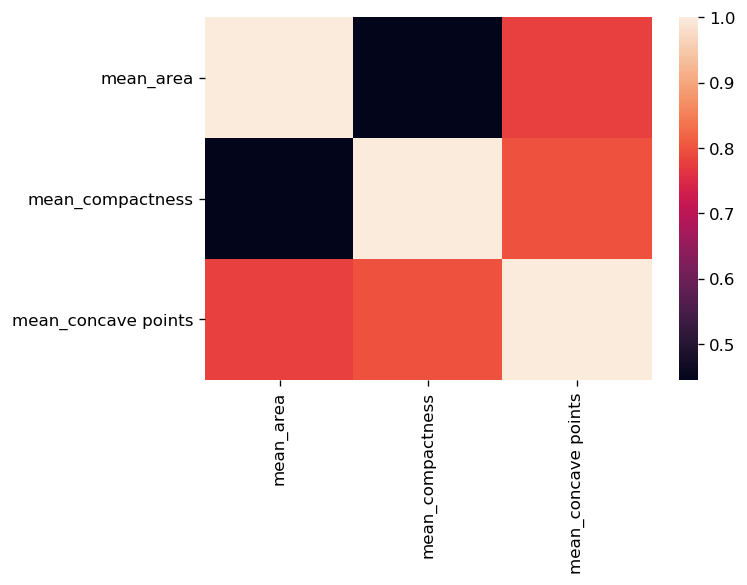

In [323]:
# Refined feature list
df_corr2 = df_data[['Diagnosis','mean_area','mean_compactness','mean_concave points']]
corr2 = df_corr2.corr()
sns.heatmap(corr2)

### Feature Correlation
In general it would be better to have features that are less correlated.
Including radius, perimeter, and area would be redundant because the three are highly correlated and have nearly the same amount of correlation for the other features. The same is true for symmetry and fractal dimension, where the heat map shows very similar correlations. Mean concave points also generally reflects mean concavity and shows similar correlation to other features.
I would remove radius, perimeter, and symmetry. Area encompasses the size reflected by radius and perimeter.

Other features that show low correlation were also removed to simplify the model
(texture, smoothness, symmetry, fractal dimension)

# Machine Learning Models
## Variable set up

I first select features that I want to use to train the model.
From the heatmaps above, I selected Area, Compactness, and Concave Points.

The response variable is the Diagnosis.

In [281]:
_data = df_data[['Diagnosis','mean_area','mean_compactness','mean_concave points']]

X = _data[['mean_area','mean_compactness','mean_concave points']]
y = _data['Diagnosis']

_data.sample(n=3, random_state=3)

,Diagnosis,mean_area,mean_compactness,mean_concave points
266,B,266.100000,0.134003,0.039777
448,B,504.413333,0.121127,0.044679
420,B,316.833333,0.097130,0.029906


## 1 - Logistic Regression
The first model will fit the data against a logistic regression. (Hopefully there is enough difference between the features to generate a decent model.

In [282]:
clf = linear_model.LogisticRegression()
clf.fit(X,y)
print(clf.intercept_, clf.coef_)

[-6.53184279] [[0.01135889 2.89954156 1.19645503]]


In [283]:
clf.score(X,y)

0.9103690685413005

This is a good score!
The chosen features fit relatively well with a logistic regression.
This is likely a sufficient fit. Fewer variables allows for less opportunity for "cheating", but this uses enough features to get a decent score.

In [284]:
l = model_selection.cross_val_score(clf,X,y,cv=20)
print(l.mean())
print(l.std())

0.9110039226418538
0.06649655053999222


The score produced above is within the range (<1 std away from mean) of the cross validated values. This suggests it was a sufficiently accurate model for predicting tumor malignancy.

## 2 - RandomForestClassifier


In [285]:
# Processed Data Frame
_data.head()

,Diagnosis,mean_area,mean_compactness,mean_concave points
0,M,1057.800000,0.330747,0.142790
1,M,1118.693333,0.092773,0.089857
2,M,1002.010000,0.208153,0.130493
3,M,327.010000,0.408260,0.127123
4,M,988.813333,0.120803,0.095217


The RandomForestClassifier only works with numeric data, so I first need to convert the Diagnosis results into numbers.
The Malignant tumors will be set to 1 and Benign to 0.

In [286]:
# Encoder Selection
d = defaultdict(preprocessing.LabelEncoder)

In [326]:
# Apply encoder to categorial variables (Diagnosis: M-1)
data_encoded = _data.copy()
for col in ['Diagnosis']:
    data_encoded[[col]] = data_encoded[[col]].apply(lambda x: d[x.name].fit_transform(x))

data_encoded.head()

,Diagnosis,mean_area,mean_compactness,mean_concave points
0,1,1057.800000,0.330747,0.142790
1,1,1118.693333,0.092773,0.089857
2,1,1002.010000,0.208153,0.130493
3,1,327.010000,0.408260,0.127123
4,1,988.813333,0.120803,0.095217


I will use the RandomForestClassifier module

In [288]:
# Model Selection
clf = RandomForestClassifier()

Defined a base set of parameters to test.
This could need refinement to achieve a better model

In [289]:
# Initial parameters
parameters = {
    'n_estimators': [6, 8, 10, 12],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1,5,10]
}

In [290]:
# Search for best parameters using crossvalidation. `cv=3` means 3-fold crossvalidation
cv = GridSearchCV(clf, parameters, cv=3)  # takes ~30 sec. Could speed up with multiprocessing, `n_jobs=4` for 4 processes
cv.fit(data_encoded, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [6, 8, 10, 12], 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 5, 10, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [291]:
print('Best params: ', cv.best_params_)
print('Best score: ', cv.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}
Best score:  1.0


The best score is already 1.0 and the best parameters were the smallest in the range, but I will try much larger parameters to make sure this is actually working.

In [292]:
# Second parameters attempt (large)

param2 = {
    'n_estimators': [202,300],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [800, 1401],
    'min_samples_split': [500, 600],
    'min_samples_leaf': [1000, 1202]
}

In [293]:
cv2 = GridSearchCV(clf, param2, cv=3)  # takes ~30 sec. Could speed up with multiprocessing, `n_jobs=4` for 4 processes
cv2.fit(data_encoded, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [202, 300], 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [800, 1401], 'min_samples_split': [500, 600], 'min_samples_leaf': [1000, 1202]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [294]:
print('Best params: ', cv2.best_params_)
print('Best score: ', cv2.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 800, 'max_features': 'sqrt', 'min_samples_leaf': 1000, 'min_samples_split': 500, 'n_estimators': 202}
Best score:  0.6274165202108963


As expected, the best score decreased all the way to 0.627...
Now I will try a new range of parameters that are lower than the first attempt.

In [295]:
# Third parameters attempt (small)

param3 = {
    'n_estimators': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1,2,3]
}

In [296]:
cv3 = GridSearchCV(clf, param3, cv=3)  # takes ~30 sec. Could speed up with multiprocessing, `n_jobs=4` for 4 processes
cv3.fit(data_encoded, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 3, 5, 7], 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [297]:
print('Best params: ', cv3.best_params_)
print('Best score: ', cv3.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Best score:  1.0


Like the first attempt, this set of parameters also produced a best score of 1.0. The first set was likely good enough.

## Test/Train Splits

In [298]:
# Create test train split
X_train = data_encoded[::2]
X_test = data_encoded[1::2]
y_train = y[::2]
y_test = y[1::2]

Created test/train splits using every other row of the original X and y dataframes.

In [299]:
# Initialize classifier using best parameters
# double stars mean "use this dictionary as the kwargs for the function"
clf = RandomForestClassifier(**cv.best_params_)

# fit/train it on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [300]:
# predict y values from X_test
y_test_predicted = clf.predict(X_test)

In [301]:
# Print the accuracy score of your predicted y values
accuracy_score(y_test, y_test_predicted)

1.0

<Figure size 720x480 with 0 Axes>

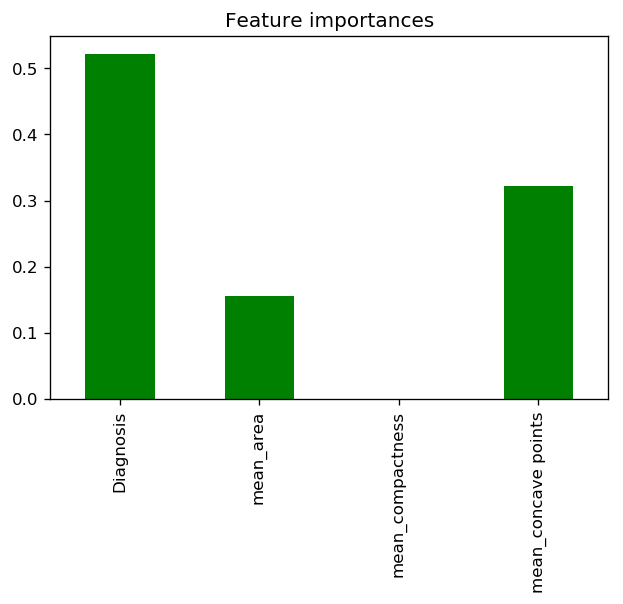

In [319]:
# Create a bar plot of relative feature importances of each feature
# You can access the feature importances with `clf.feature_importances_` 
# and the column names with `data_encoded.columns`f, ax = plt.subplots()

plt.figure('Feature Importances')
pd.DataFrame(clf.feature_importances_, index=data_encoded.columns).plot(kind='bar',color='Green',legend=False)
ax.set_ylabel('relative importance')
ax.set_xlabel('feature name')
plt.title('Feature importances')
plt.show()

In [320]:
clf.feature_importances_

array([0.52217589, 0.15550771, 0.        , 0.3223164 ])

The feature importance values show how each value is used for the model. The compactness had an importance of 0 so it was unnecessary with the other features.

In [321]:
lrfc = model_selection.cross_val_score(clf,X,y,cv=20)
print(lrfc.mean())
print(lrfc.std())

0.9265257252326217
0.047748789543087554


Either way, the best score was still very good.

## Parameter implications

Best parameters of first and second set tends towards the lower numbers, suggesting that smaller parameters could be preferred.
Even when decreasing the parameters even smaller than the first parameter set (param3), the best score was still 1.

Best used parameters were:
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 3}

However, both parameter sets 1 and 3 produced a best score of 1.0 so they are both sufficient.
It does seem a bit unlikely that it could be a perfect 1.0 though.

## Comparison of two models (LogRegression vs RandomForestClassifier)

The two models both returned high scores (0.91 and 1.0). Clearly the RandomForestClassifier method was more accurate, but the Logistic Regression model could also be acceptable given its good score.
The assumption that the data set followed a logistical trend may not have been accurate, resulting in a slightly lower score. On the other hand, the RandomForestClassifier model must have satisfied each category of the tree, using the provided parameters.

In [328]:
# The END - Happy Holidays!

#      ^
#     ^O^
#    ^O^O^
#   ^O^O^O^
#  ^O^O^O^O^
# ^O^O^O^O^O^
#      U
     
     